# Introduction to Regression with neural netrowks in Tensor FLow

There are many definitions for a regression problem but in our case we are going to keep it simple : Predicting a numerical variable based on other variables even shorter prediting a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


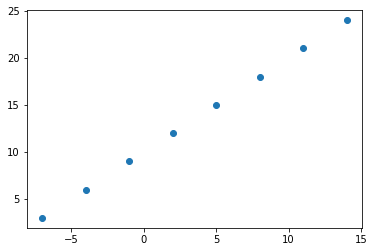

In [3]:
## Creating some data to view and fit
import numpy as np 
import matplotlib.pyplot as plt
# Creating features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualise it
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# This is the relation between our inputs and outputs


### Lets Check out our input and output shape

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = x.shape
output_shape  = y.shape
input_shape,output_shape

((8,), (8,))

In [8]:
# Turn our numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Step in modeling with tensor flow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function - the function that tells our function how wrong it is and optimizer that tells our function how to improve itself and evaluation metrics that tells how well is the performance of our model
3. **Fitting a model** - letting the model try to find patterns betwqeen x and y

In [12]:
# Set Randdom Seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.mae,# mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 859ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred +11

1/1 [==============================] - 0s 29ms/step


array([[23.71602]], dtype=float32)

In [ ]:
## Improving Our Model